In [1]:
import matplotlib 
matplotlib.use('Agg') 
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def plot_logs(history):
    evaluation_cost = history.history['val_loss']
    evaluation_accuracy = history.history['val_acc']
    training_cost = history.history['loss']
    training_accuracy = history.history['acc']
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figwidth(10)
    ax1.plot(evaluation_cost,label= 'test')
    ax1.plot(training_cost, label='train')
    ax1.set_title('Cost')
    ax1.legend()
    ax2.plot(evaluation_accuracy, label='test')
    ax2.plot(training_accuracy, label='train')
    ax2.set_title('Accuracy')
    ax2.legend(loc='lower right')

In [3]:
import keras
class WeightsHistory(keras.callbacks.Callback):
  

    def on_epoch_end(self, epoch, logs):
        print(epoch)
    

Using TensorFlow backend.


In [20]:
import numpy
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import regularizers

batch_size = 10
nb_classes = 10
nb_epoch = 30

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)[:50000,:]
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train[:50000], nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(30, input_shape=(784,))) # kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(10)) # kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
n_np = numpy.array( model.get_weights()[0])
for i in range(30):
    o_np = n_np
    model.fit(X_train, Y_train,
                        batch_size=batch_size, epochs=1,
                        verbose=2, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    
    n_np = numpy.array(model.get_weights()[0])
    d_np = n_np - o_np
    print(numpy.linalg.norm(d_np))
    
#    for weight in weights:
#        print(len(weight))
#    print(weights[3])
    
        
print('Test score:', score[0])
print('Test accuracy:', score[1])

50000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                23550     
_________________________________________________________________
activation_45 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_46 (Activation)   (None, 10)                0         
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
7s - loss: 0.5129 - acc: 0.8774 - val_loss: 0.2651 - val_acc: 0.9225
28.012
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
9s - loss: 0.2459 - acc: 0.9263 - v

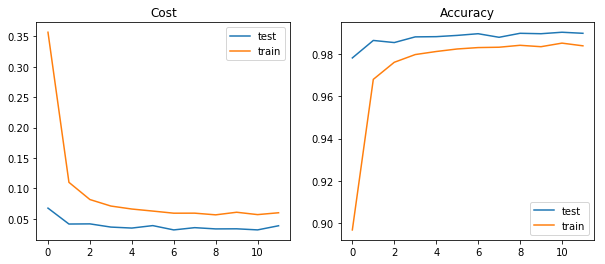

In [12]:
plot_logs(history)

In [13]:
history.__dict__

{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'history': {'acc': [0.89661666676203411,
   0.96811666669845586,
   0.97623333339691165,
   0.97990000006357825,
   0.98135000003178918,
   0.98255000003178916,
   0.98321666673024499,
   0.98338333336512251,
   0.98430000009536744,
   0.98363333339691161,
   0.98533333333333328,
   0.98404999999999998],
  'loss': [0.3565979616324107,
   0.10986235253810883,
   0.08159195179541906,
   0.070903886894385024,
   0.065989336803555482,
   0.062632201756536957,
   0.059152580281098682,
   0.059206081442286569,
   0.0564329680763185,
   0.060700366028149925,
   0.056821525609493252,
   0.059862820374965667],
  'val_acc': [0.97829999999999995,
   0.98660000000000003,
   0.98560000000000003,
   0.98829999999999996,
   0.98839999999999995,
   0.98899999999999999,
   0.98980000000000001,
   0.98809999999999998,
   0.98999999999999999,
   0.98980000000000001,
   0.99050000000000005,
   0.98999999999999999],
  'val_loss': [0.067472899950668214,
   

In [5]:
## now with convolution layers

In [8]:
import numpy as np
from keras.datasets import mnist

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

np.random.seed(1337)  # for reproducibility
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


model = Sequential()

model.add(Conv2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
3s - loss: 0.3566 - acc: 0.8966 - val_loss: 0.0675 - val_acc: 0.9783
Epoch 2/12
3s - loss: 0.1099 - acc: 0.9681 - val_loss: 0.0413 - val_acc: 0.9866
Epoch 3/12
3s - loss: 0.0816 - acc: 0.9762 - val_loss: 0.0416 - val_acc: 0.9856
Epoch 4/12
3s - loss: 0.0709 - acc: 0.9799 - val_loss: 0.0363 - val_acc: 0.9883
Epoch 5/12
3s - loss: 0.0660 - acc: 0.9814 - val_loss: 0.0347 - val_acc: 0.9884
Epoch 6/12
3s - loss: 0.0626 - acc: 0.9826 - val_loss: 0.0387 - val_acc: 0.9890
Epoch 7/12
3s - loss: 0.0592 - acc: 0.9832 - val_loss: 0.0317 - val_acc: 0.9898
Epoch 8/12
3s - loss: 0.0592 - acc: 0.9834 - val_loss: 0.0354 - val_acc: 0.9881
Epoch 9/12
3s - loss: 0.0564 - acc: 0.9843 - val_loss: 0.0333 - val_acc: 0.9900
Epoch 10/12
3s - loss: 0.0607 - acc: 0.9836 - val_loss: 0.0335 - val_acc: 0.9898
Epoch 11/12
3s - loss: 0.0568 - acc: 0.9853 - val_loss: 0.0317 - val_acc: 0.9905
Epoch 12/12
3s - loss: 0.0599 - acc: 0.9841 - val_loss: 0.0385 - val

In [9]:
import numpy as np
from keras.datasets import mnist

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

np.random.seed(1337)  # for reproducibility
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


model = Sequential()

model.add(Conv2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
3s - loss: 1.5899 - acc: 0.4826 - val_loss: 0.4338 - val_acc: 0.8840
Epoch 2/12
3s - loss: 0.6076 - acc: 0.8147 - val_loss: 0.2749 - val_acc: 0.9132
Epoch 3/12
3s - loss: 0.4586 - acc: 0.8607 - val_loss: 0.2222 - val_acc: 0.9332
Epoch 4/12
5s - loss: 0.4001 - acc: 0.8785 - val_loss: 0.1912 - val_acc: 0.9416
Epoch 5/12
3s - loss: 0.3606 - acc: 0.8937 - val_loss: 0.1775 - val_acc: 0.9446
Epoch 6/12
3s - loss: 0.3384 - acc: 0.8992 - val_loss: 0.1645 - val_acc: 0.9506
Epoch 7/12
3s - loss: 0.3166 - acc: 0.9044 - val_loss: 0.1527 - val_acc: 0.9531
Epoch 8/12
3s - loss: 0.2983 - acc: 0.9106 - val_loss: 0.1480 - val_acc: 0.9565
Epoch 9/12
3s - loss: 0.2807 - acc: 0.9161 - val_loss: 0.1345 - val_acc: 0.9574
Epoch 10/12
3s - loss: 0.2718 - acc: 0.9190 - val_loss: 0.1276 - val_acc: 0.9591
Epoch 11/12
3s - loss: 0.2595 - acc: 0.9224 - val_loss: 0.1271 - val_acc: 0.9613
Epoch 12/12
3s - loss: 0.2531 - acc: 0.9253 - val_loss: 0.1199 - val

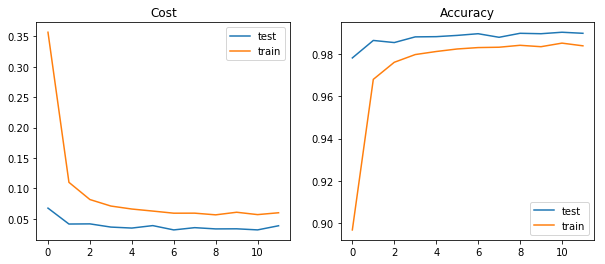

In [10]:
plot_logs(history)

In [17]:
import numpy as np
from keras.datasets import mnist

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam

np.random.seed(1337)  # for reproducibility
batch_size = 256
nb_classes = 10
nb_epoch = 30

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use                                  
nb_filters = 32     
nb_filters2 = 48
nb_filters3 = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)                                                             
                                                                               
model_ = Sequential()                                                          
                                                                               
model_.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]),           
                            border_mode='valid',                               
                                                    input_shape=input_shape))  
model_.add(Activation('relu'))                                                 
model_.add(Conv2D(nb_filters2, (kernel_size[0], kernel_size[1])))          
model_.add(Activation('relu'))                                                 
model_.add(MaxPooling2D(pool_size=pool_size))                                  
model_.add(Dropout(0.25))                                                      
model_.add(Conv2D(nb_filters3, (kernel_size[0], kernel_size[1])))         
model_.add(Activation('relu'))                                                 
model_.add(MaxPooling2D(pool_size=pool_size))                                  
model_.add(Dropout(0.25))                                                      
                                                                               
                                                                               
model_.add(Flatten())                                                          
model_.add(Dense(256))                                                         
model_.add(Activation('relu'))                                                 
model_.add(Dropout(0.5))                                                       
                                                                               
model_.add(Dense(128))                                                         
model_.add(Activation('relu'))                                                 
                                                                               
model_.add(Dense(nb_classes))                                                  
model_.add(Activation('softmax'))                                              
                                                                               
model_.compile(loss='categorical_crossentropy',                                
                      optimizer='Adam',                                   
                      metrics=['accuracy'])                      
                                                                               
#history_ = model_.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
#                  verbose=2, validation_data=(X_test, Y_test))  

for i in range(10):
    score = model_.evaluate(X_test, Y_test, verbose=2) 
    weights = model_.get_weights()
    for weight in weights:
        print(len(weight))
    print(weights[3])

    model_.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=1,
                 verbose=2, validation_data=(X_test, Y_test))  
        

score = model_.evaluate(X_test, Y_test, verbose=2) 
weights = model.get_weights()
for weight in weights:
    print(len(weight))
print(weights[3])

print('Test score:', score[0])                                                 
print('Test accuracy:', score[1])                                              
  

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`


3
32
3
48
3
64
1600
256
256
128
128
10
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
4s - loss: 0.3612 - acc: 0.8835 - val_loss: 0.0643 - val_acc: 0.9784
3
32
3
48
3
64
1600
256
256
128
128
10
[-0.01283848 -0.0096377   0.00345578 -0.01137695 -0.01514366 -0.00328854
  0.01058243  0.01730751  0.01355767  0.0142025  -0.00274067 -0.01450866
 -0.00995566 -0.00566131  0.00257753 -0.00998909 -0.00381539 -0.01798826
 -0.01094208 -0.00217533 -0.01895252 -0.01128844 -0.01546262 -0.01225316
  0.00159848  0.01442088 -0.0005675  -0.01061232 -0.01811947  0.00363405
 -0.01304261 -0.00589229  0.00845028 -0.00878603 -0.00601868 -0.0125191
  0.00120062 -0.02979659  0.01469032 -0.02512162  0.00069411 -0.01075198
  0.00215612 -0.00776287  0.01700664 -0.00090379 -0.01758654 -0.0063515 ]
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
3s - loss: 0.0966 - acc: 0.9707 - val_loss: 0.0355 - val_acc: 0.9890
3
32
3
48
3
64
1600
256
256
128
128
10
[ -1.02270730e-02  -7.51820812e-03   2.79585808e-03  -1.33545818e-02
  -1.327862

In [16]:
Conv2D?